In [57]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:

# Define the ticker symbol for BTCUSD
ticker_symbol = 'BTC-USD'

day_palette = {
    'Monday': 'green',
    'Tuesday': 'red',
    'Wednesday': 'blue',
    'Thursday': 'purple',
    'Friday': 'pink',
    'Saturday': 'orange',
    'Sunday': 'yellow'
}

year_palette = {
    2019: 'yellow',
    2024: 'red',
    2022: 'green',
    2023: 'blue'
}

In [70]:
btc_data_from_2019_to_2024_part_1_1_d = yf.download(ticker_symbol, start='2019-01-01', end='2024-10-07', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [71]:
btc_data_from_2019_to_2024_part_1_1_d.index.name = btc_data_from_2019_to_2024_part_1_1_d.index.name.lower()
btc_data_from_2019_to_2024_part_1_1_d.columns = btc_data_from_2019_to_2024_part_1_1_d.columns.str.lower()

In [72]:
btc_data_from_2019_to_2024_part_1_1_d['year'] = btc_data_from_2019_to_2024_part_1_1_d.index.year
btc_data_from_2019_to_2024_part_1_1_d['month'] = btc_data_from_2019_to_2024_part_1_1_d.index.month
btc_data_from_2019_to_2024_part_1_1_d['day_name'] = btc_data_from_2019_to_2024_part_1_1_d.index.day_name()

In [73]:
btc_data_from_2019_to_2024_part_1_1_d['max'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].max(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['min'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].min(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['difference'] = btc_data_from_2019_to_2024_part_1_1_d['max'] - btc_data_from_2019_to_2024_part_1_1_d['min']

In [79]:
btc_data_from_2019_to_2024_part_1_1_d = btc_data_from_2019_to_2024_part_1_1_d[~btc_data_from_2019_to_2024_part_1_1_d['year'].isin([2020, 2021])]

In [80]:
day_year_volume_analysis = btc_data_from_2019_to_2024_part_1_1_d.groupby(['day_name', 'year']).agg({'volume': 'sum'}).reset_index()

In [81]:
day_year_volume_analysis

,day_name,year,volume
0,Friday,2019,885692997601
1,Friday,2022,1709486343349
2,Friday,2023,1049316919164
3,Friday,2024,1116153932284
4,Monday,2019,891655208008
5,Monday,2022,1703933519026
6,Monday,2023,1044716645568
7,Monday,2024,1191379140793
8,Saturday,2019,817424674761
9,Saturday,2022,1183759148879


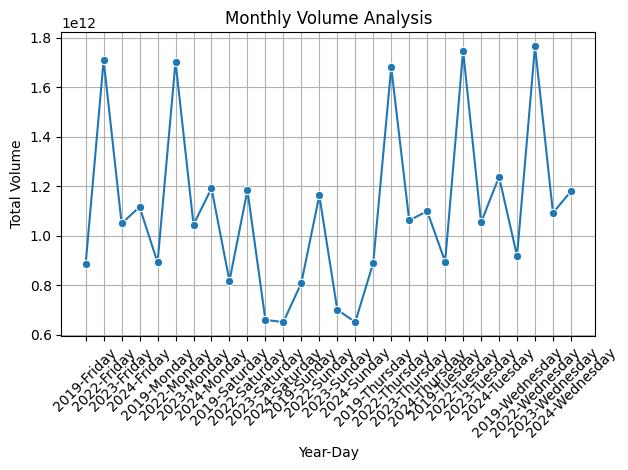

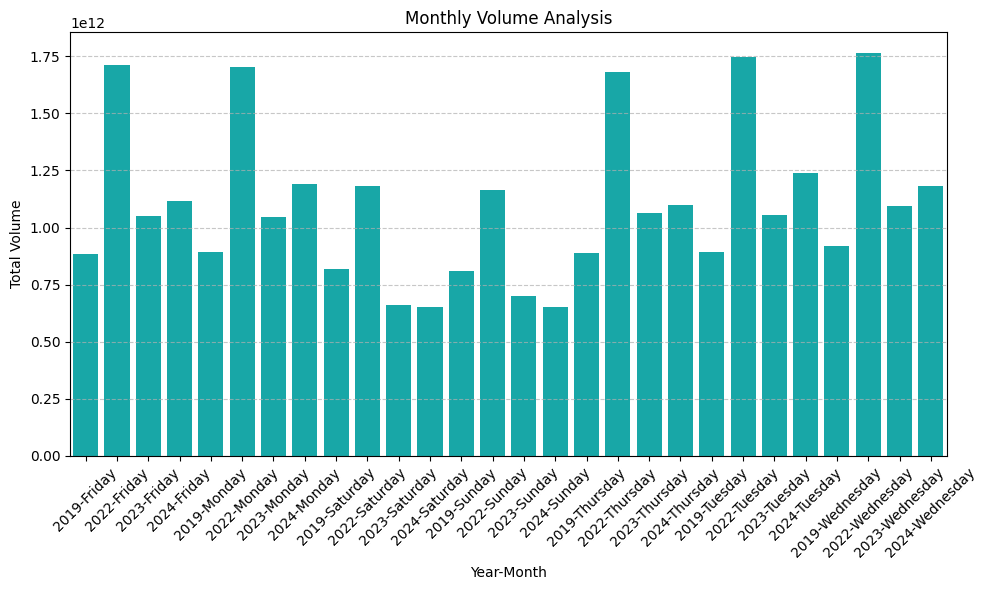

In [82]:
# Create a combined 'Year-Month' column for better x-axis labels
day_year_volume_analysis['year_day'] = day_year_volume_analysis['year'].astype(str) + '-' + day_year_volume_analysis['day_name'].astype(str)

# Line Plot
sns.lineplot(data=day_year_volume_analysis, x='year_day', y='volume', marker='o')
plt.title('Monthly Volume Analysis')
plt.xlabel('Year-Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_year_volume_analysis, x='year_day', y='volume', color='c')
plt.title('Monthly Volume Analysis')
plt.xlabel('Year-Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

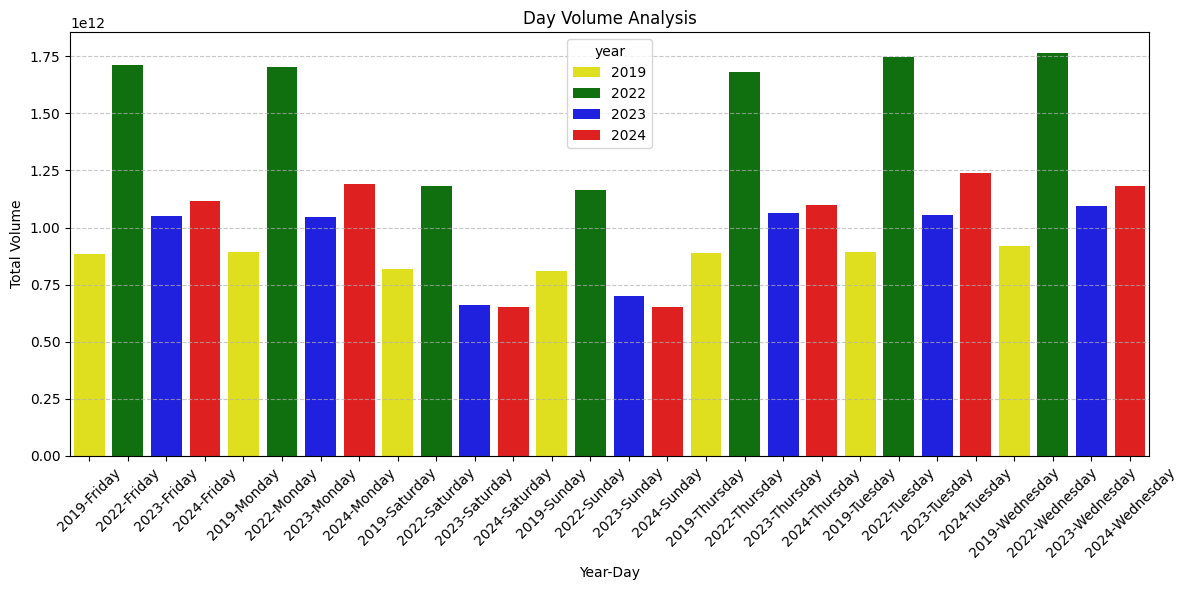

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day_year_volume_analysis, x='year_day', y='volume', hue='year', palette=year_palette)
plt.title('Day Volume Analysis')
plt.xlabel('Year-Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
